In [1]:
import os, pandas as pd, numpy as np

In [2]:
os.chdir("D:\SCMA632\Assignment")

In [3]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [4]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [5]:
HP = df[df['state_1']=="HP"]

In [6]:
HP.isnull().sum().sort_values(ascending = False)

soyabean_q             2041
soyabean_v             2041
Meals_School           2033
Meals_Employer         2012
Otherwise_possessed    1987
                       ... 
brinjal_q                 0
tamato_q                  0
onion_q                   0
potato_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [7]:
 df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [8]:
HP_new = HP[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [9]:
HP_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       25
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [10]:
HP_clean = HP_new.copy()

In [11]:
HP_clean.loc[:, 'Meals_At_Home'] = HP_clean['Meals_At_Home'].fillna(HP_new['Meals_At_Home'].mean())

In [12]:
HP_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

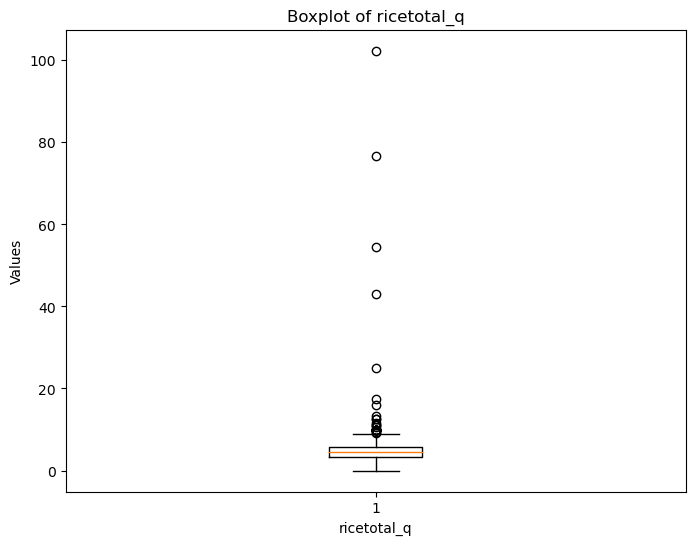

In [13]:
import matplotlib.pyplot as plt
# Assuming HP_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(HP_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [14]:
rice1 = HP_clean['ricetotal_q'].quantile(0.25)
rice2 = HP_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [16]:
HP_clean=HP_new[(HP_new['ricetotal_q']<=up_limit)&(HP_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x205dca6e290>,
 'caps': [<matplotlib.lines.Line2D at 0x205dca6fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x205dca6da10>],
 'medians': [<matplotlib.lines.Line2D at 0x205dca70550>],
 'fliers': [<matplotlib.lines.Line2D at 0x205dca6e2d0>],
 'means': []}

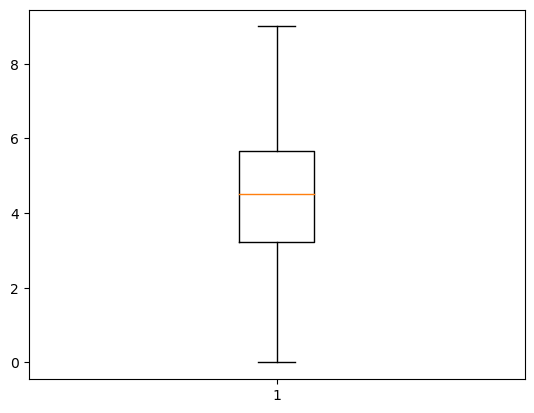

In [18]:
plt.boxplot(HP_clean['ricetotal_q'])

In [19]:
HP_clean['District'].unique()

array([11,  8,  9,  7, 10,  6,  1,  5,  4,  2, 12,  3], dtype=int64)

In [20]:
# Replace values in the 'Sector' column
HP_clean.loc[:,'Sector'] = HP_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [21]:
HP_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [23]:
HP_clean.loc[:, 'total_consumption'] = HP_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [25]:
HP_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
38447,HP,11,RURAL,2,22,6.0,4.0,0.0,0,0.00,0.0,21.930450,50.000,60.0,81.930450
38448,HP,11,RURAL,2,22,5.0,8.0,1.0,0,0.00,0.4,28.820800,15.025,69.0,58.245800
38449,HP,11,RURAL,2,22,8.0,5.0,1.0,0,1.00,0.8,50.931400,90.000,85.0,156.731400
38450,HP,11,RURAL,2,22,5.0,4.0,0.0,0,0.25,0.0,25.350655,0.000,90.0,34.600655
38451,HP,11,RURAL,2,22,5.0,6.0,0.0,0,0.00,0.0,29.371060,20.000,90.0,60.371060


In [26]:
HP_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              36.010586  65.454632  334.960925  8.9
2              39.156418  71.546153  418.104420  0.0

In [27]:
HP_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                38.534721  73.856647  338.941060  30.774605
2                32.002013  65.783050  261.600570  28.422362
3                23.240801  64.556711  177.735633  36.565119
4                29.213298  58.559845  280.150445  20.000000
5                29.947842  61.538989  216.815618  20.760076
6                52.863351  79.162804  334.960925   8.900000
7                34.836295  63.210596  242.250420  24.350175
8                36.929806  69.739637  233.088106  26.415095
9                47.952621  72.250616  418.104420   0.000000
10               22.986820  60.867606  151.921595  20.517595
11               36.912597  74.929460  276.306960  20.000000
12               57.020530  89.019560  313.045700  28.337612

In [28]:
total_consumption_by_districtcode=HP_clean.groupby('District')['total_consumption'].sum()

In [29]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
2     22629.369131
11    16559.410756
5     15692.442149
Name: total_consumption, dtype: float64

In [31]:
HP_clean.loc[:,"District"] = HP_clean.loc[:,"District"].replace({2: "kANGRA", 11: "SHIMLA", 5: "MANDI"})

In [32]:
total_consumption_by_districtname=HP_clean.groupby('District')['total_consumption'].sum()

In [33]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
kANGRA    22629.369131
SHIMLA    16559.410756
MANDI     15692.442149
Name: total_consumption, dtype: float64

In [34]:
from statsmodels.stats import weightstats as stests

In [36]:
rural=HP_clean[HP_clean['Sector']=="RURAL"]
urban=HP_clean[HP_clean['Sector']=="URBAN"]

In [37]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
38447,HP,SHIMLA,RURAL,2,22,6.0,4.0,0.0,0,0.00,0.0,21.930450,50.000,60.0,81.930450
38448,HP,SHIMLA,RURAL,2,22,5.0,8.0,1.0,0,0.00,0.4,28.820800,15.025,69.0,58.245800
38449,HP,SHIMLA,RURAL,2,22,8.0,5.0,1.0,0,1.00,0.8,50.931400,90.000,85.0,156.731400
38450,HP,SHIMLA,RURAL,2,22,5.0,4.0,0.0,0,0.25,0.0,25.350655,0.000,90.0,34.600655
38451,HP,SHIMLA,RURAL,2,22,5.0,6.0,0.0,0,0.00,0.0,29.371060,20.000,90.0,60.371060


In [38]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
95748,HP,SHIMLA,URBAN,2,22,5.50,6.0,0.50,0,0.0,0.0,37.986150,50.0175,90.0,100.003650
95749,HP,SHIMLA,URBAN,2,22,4.80,7.2,0.00,0,0.0,0.0,32.144330,34.0090,90.0,78.153330
95750,HP,SHIMLA,URBAN,2,22,5.00,10.0,0.00,0,0.0,0.0,80.800750,50.0250,90.0,145.825750
95751,HP,SHIMLA,URBAN,2,22,4.75,5.5,0.00,0,0.0,0.0,24.850615,25.0075,90.0,60.108115
95752,HP,SHIMLA,URBAN,2,22,4.75,6.0,0.25,0,0.5,0.0,26.163213,22.5075,90.0,60.170713


In [39]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [40]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 2.8374570222787328
P-Value: 0.004547446846272496
